# LIVER DISEASE CLASSIFICATION

## EDA

In [1]:
#Importing all the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
import pickle

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the liver disease dataset
liver_disease_data = pd.read_csv("Datasets/liver_disease.csv", sep=';')
liver_disease_data.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
# Shape of the liver_disease_data
liver_disease_data.shape

(615, 13)

In [4]:
#List of all the columns header
liver_disease_data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [5]:
# Removing whitespace from columns
liver_disease_data.columns = liver_disease_data.columns.str.replace(' ', '') 
liver_disease_data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase', 'protein'],
      dtype='object')

In [6]:
# Information on datatype
liver_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     615 non-null    object 
dtypes: float64(9), int64(1), object(3)


**Protein feature data type is object instead of float or int.**

In [7]:
#Analyzing the reason for object datatype on protein feature
protein_list = list(liver_disease_data['protein'].unique())

#Finding if there are any string in protein
for protein in protein_list:
    try:
        float(protein)
    except ValueError as e:
        print(e)

could not convert string to float: 'NA    '


In [8]:
# Replacing the 'NA    ' with NaN in protein feature
liver_disease_data['protein'] = liver_disease_data['protein'].replace('NA    ', 'NaN') 

In [9]:
# Coverting the protein datatype to float instead of object
liver_disease_data['protein']=liver_disease_data['protein'].astype(float)

In [10]:
#Again checking the datatype of dataset
liver_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   category                    615 non-null    object 
 1   age                         615 non-null    int64  
 2   sex                         615 non-null    object 
 3   albumin                     614 non-null    float64
 4   alkaline_phosphatase        597 non-null    float64
 5   alanine_aminotransferase    614 non-null    float64
 6   aspartate_aminotransferase  615 non-null    float64
 7   bilirubin                   615 non-null    float64
 8   cholinesterase              615 non-null    float64
 9   cholesterol                 605 non-null    float64
 10  creatinina                  615 non-null    float64
 11  gamma_glutamyl_transferase  615 non-null    float64
 12  protein                     614 non-null    float64
dtypes: float64(10), int64(1), object(2)

In [11]:
# Finding the null values
liver_disease_data.isna().sum()

category                       0
age                            0
sex                            0
albumin                        1
alkaline_phosphatase          18
alanine_aminotransferase       1
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                   10
creatinina                     0
gamma_glutamyl_transferase     0
protein                        1
dtype: int64

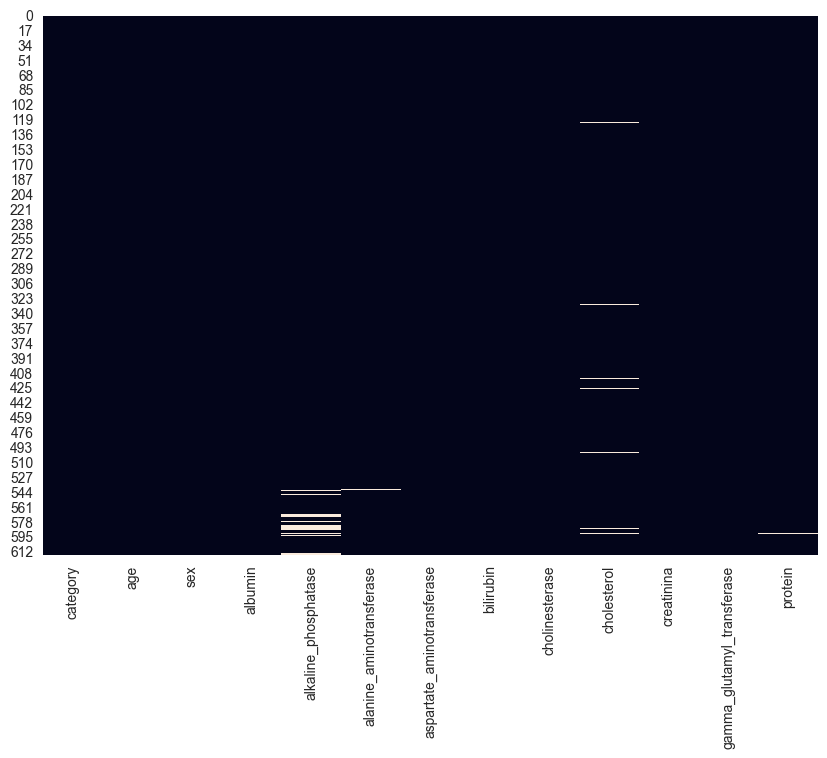

In [12]:
# Visual representation of the null values
plt.figure(figsize =(10, 7)) 
sns.heatmap(liver_disease_data.isnull(), cbar=False)
plt.show()

In [13]:
#Finding all the rows with null values
ld1 = liver_disease_data[liver_disease_data.isna().any(axis=1)]
display(ld1)
print("Total number of rows with null values are - ", ld1.shape)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
121,no_disease,43,m,48.6,45.0,10.5,40.5,5.3,7.09,NaN,63.0,25.1,70.0
319,no_disease,32,f,47.4,52.5,19.1,17.1,4.6,10.19,NaN,63.0,23.0,72.2
329,no_disease,33,f,42.4,137.2,14.2,13.1,3.4,8.23,NaN,48.0,25.7,74.4
413,no_disease,46,f,42.9,55.1,15.2,29.8,3.6,8.37,NaN,61.0,29.0,71.9
424,no_disease,48,f,45.6,107.2,24.4,39.0,13.8,9.77,NaN,88.0,38.0,75.1
433,no_disease,48,f,46.8,93.3,10.0,23.2,4.3,12.41,NaN,52.0,23.9,72.4
498,no_disease,57,f,48.4,94.4,2.5,39.6,2.3,8.84,NaN,82.0,6.4,76.8
540,hepatitis,38,m,45.0,56.3,NaN,33.1,7.0,9.58,6.0,77.9,18.9,63.0
541,hepatitis,19,m,41.0,NaN,87.0,67.0,12.0,7.55,3.9,62.0,65.0,75.0
545,hepatitis,29,m,49.0,NaN,53.0,39.0,15.0,8.79,3.6,79.0,37.0,90.0


Total number of rows with null values are -  (26, 13)


**Total no of rows with null values are 4.2% of the entire dataset.**

In [14]:
# Finding the number of unique values count on category feature
print("The counts for unique values in entire dataset :",liver_disease_data['category'].value_counts())
print("The counts for unique values in dataset with null values:",ld1['category'].value_counts())

The counts for unique values in entire dataset : category
 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: count, dtype: int64
The counts for unique values in dataset with null values: category
fibrosis      9
no_disease    7
cirrhosis     6
hepatitis     4
Name: count, dtype: int64


**After comparing the counts of category on entire dataset and dataset with null values, we decided not to drop null values. Instead replace with median.**

In [15]:
# Replacing the null values with median values
columns_with_null = liver_disease_data.columns[liver_disease_data.isna().any()].tolist()
liver_disease_data[columns_with_null] = liver_disease_data[columns_with_null].fillna(liver_disease_data[columns_with_null].median())

In [16]:
# Checking if null values still exist
liver_disease_data.isna().sum()

category                      0
age                           0
sex                           0
albumin                       0
alkaline_phosphatase          0
alanine_aminotransferase      0
aspartate_aminotransferase    0
bilirubin                     0
cholinesterase                0
cholesterol                   0
creatinina                    0
gamma_glutamyl_transferase    0
protein                       0
dtype: int64

In [17]:
# Finding the numerical columns list
num_columns_list = liver_disease_data.select_dtypes(include=np.number).columns.tolist()
num_columns_list

['age',
 'albumin',
 'alkaline_phosphatase',
 'alanine_aminotransferase',
 'aspartate_aminotransferase',
 'bilirubin',
 'cholinesterase',
 'cholesterol',
 'creatinina',
 'gamma_glutamyl_transferase',
 'protein']

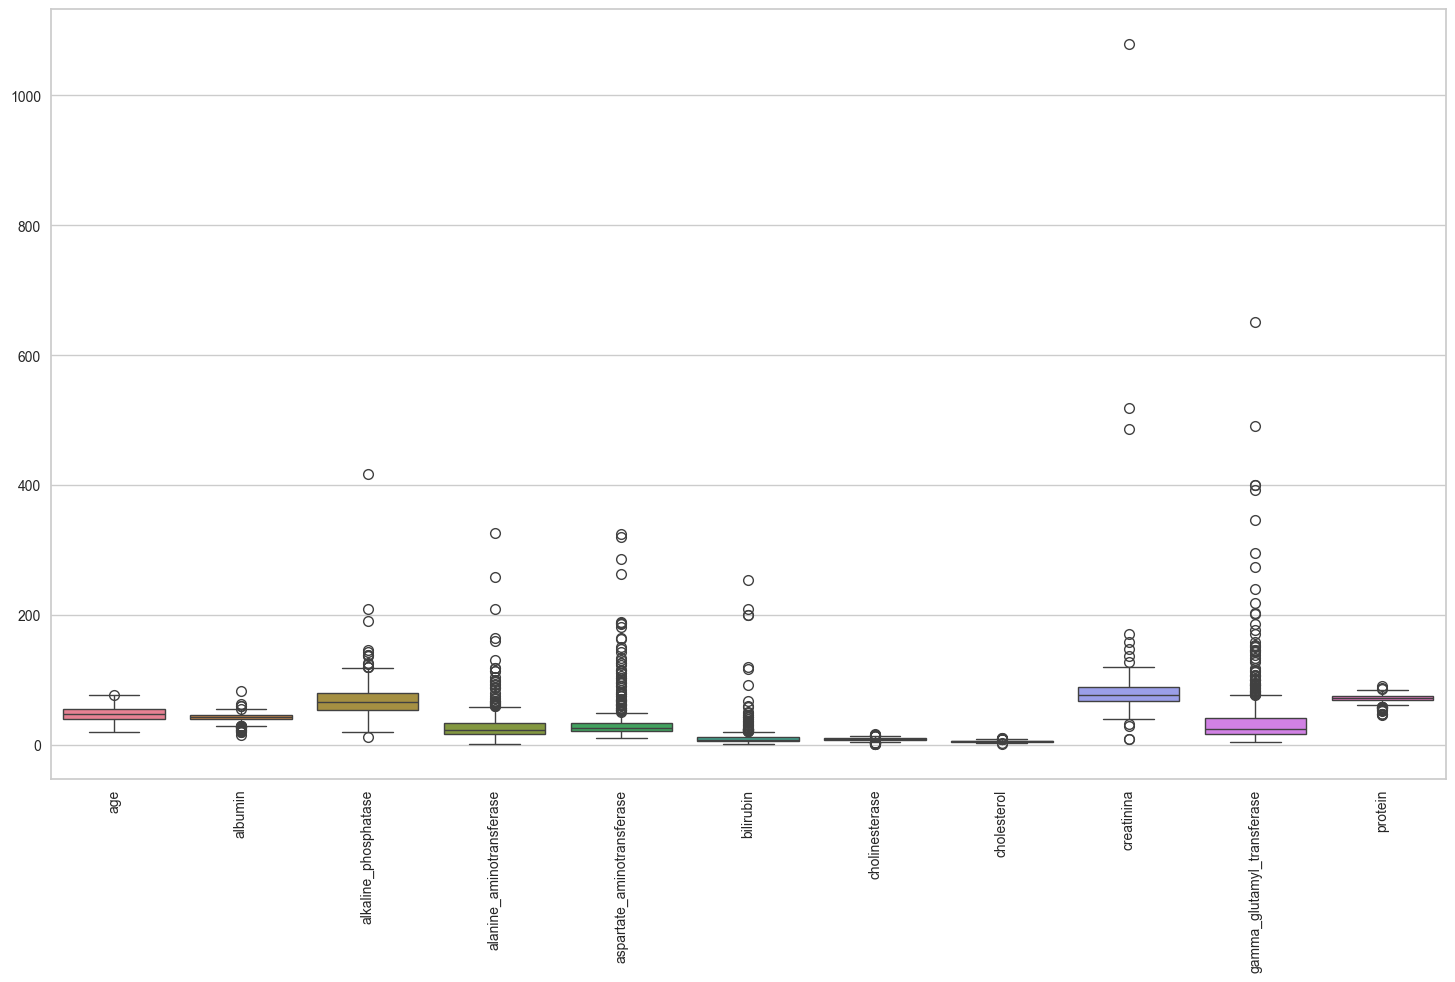

In [18]:
#Visualizing the outliers using the box plot
plt.figure(figsize =(18, 10))
sns.boxplot(data = liver_disease_data[num_columns_list]) 
plt.xticks(rotation=90)
plt.show()

In [19]:
# Creating a function to plot histogram
def plot_hist(column):
    fig = px.histogram(liver_disease_data, x = column, title="Histogram plot for "+ column)
    fig.show()
    print("\033[1mThe skewness for ", column, " : ", liver_disease_data[column].skew(),"\033[0m")

In [20]:
#Plotting histogram plot for numerical columns
for each in num_columns_list:
    plot_hist(each)

The skewness for  age  :  0.2671344915803825 


The skewness for  albumin  :  -0.1771885058799382 


The skewness for  alkaline_phosphatase  :  4.730036198363733 


The skewness for  alanine_aminotransferase  :  5.510989140611117 


The skewness for  aspartate_aminotransferase  :  4.940326985589485 


The skewness for  bilirubin  :  8.385436707897524 


The skewness for  cholinesterase  :  -0.11023271035660376 


The skewness for  cholesterol  :  0.3818348106611287 


The skewness for  creatinina  :  15.169291145044488 


The skewness for  gamma_glutamyl_transferase  :  5.632734058440102 


The skewness for  protein  :  -0.9646072882087238 


In [21]:
# Creating a function to find the number of outliers in each features
def num_of_outliers(column):
    # calculate IQR for column
    Q1 = liver_disease_data[column].quantile(0.25)
    Q3 = liver_disease_data[column].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = liver_disease_data[(liver_disease_data[column] < Q1 - threshold * IQR) | (liver_disease_data[column] > Q3 + threshold * IQR)]
    print("Total number of outliers in ", column, " - ", len(outliers))

In [22]:
#finding the number of outliers in each features
for each in num_columns_list:
    num_of_outliers(each)

Total number of outliers in  age  -  1
Total number of outliers in  albumin  -  27
Total number of outliers in  alkaline_phosphatase  -  14
Total number of outliers in  alanine_aminotransferase  -  36
Total number of outliers in  aspartate_aminotransferase  -  64
Total number of outliers in  bilirubin  -  47
Total number of outliers in  cholinesterase  -  24
Total number of outliers in  cholesterol  -  12
Total number of outliers in  creatinina  -  12
Total number of outliers in  gamma_glutamyl_transferase  -  65
Total number of outliers in  protein  -  20


In [23]:
# FInding index of all outliers present in dataset
outliers_index=[]
for each in num_columns_list:
    Q1 = liver_disease_data[each].quantile(0.25)
    Q3 = liver_disease_data[each].quantile(0.75)
    IQR = Q3 - Q1

    # identify outliers
    threshold = 1.5
    outliers = liver_disease_data[(liver_disease_data[each] < Q1 - threshold * IQR) | (liver_disease_data[each] > Q3 + threshold * IQR)].index
    for outlier in outliers.tolist():
        if outlier not in outliers_index:
            outliers_index.append(outlier)


In [24]:
#Finding all the rows with outliers
ld2 = liver_disease_data.iloc[outliers_index]
display(ld2)
print("Total number of rows with outliers values are - ", ld2.shape)

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
317,no_disease,77,m,52.2,52.2,12.0,23.5,10.9,5.51,4.41,103.0,25.8,67.2
27,no_disease,34,m,29.0,41.6,29.1,16.1,4.8,6.82,4.03,62.0,14.5,53.2
42,no_disease,35,m,27.8,99.0,30.7,27.8,9.4,6.80,4.27,65.0,40.5,80.7
173,no_disease,47,m,55.4,61.2,25.4,32.9,28.3,8.39,5.25,96.0,10.3,82.1
216,no_disease,52,m,82.2,82.2,37.0,23.7,7.8,8.90,6.09,77.0,87.8,67.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,fibrosis,53,m,46.0,66.2,34.0,43.0,14.0,8.77,4.00,112.0,203.0,76.0
583,fibrosis,56,f,39.0,66.2,42.0,34.0,10.0,7.75,5.00,80.0,84.0,78.0
59,no_disease,37,m,38.6,61.2,24.6,31.9,7.9,6.02,4.63,72.0,10.3,56.3
287,no_disease,62,m,46.6,98.0,36.7,29.4,7.0,7.56,5.52,70.0,23.1,86.5


Total number of rows with outliers values are -  (168, 13)


**Given the abundance of outlier data, removing outliers is impractical. As an alternative, replacing outliers with the median is a viable option. For the time being, we'll proceed with the data including outliers and address them during model building if necessary.**

In [25]:
#Descriptive Summary
liver_disease_data.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [26]:
# Treating the categorical feature sex. Applying one hot encoding
liver_disease_data_encoded = pd.get_dummies(liver_disease_data, columns = ['sex'], dtype=int)
liver_disease_data_encoded

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,sex_f,sex_m
0,no_disease,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,no_disease,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,no_disease,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,no_disease,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,no_disease,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,0
611,cirrhosis,64,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,0
612,cirrhosis,64,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,0
613,cirrhosis,46,33.0,66.2,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1,0


In [27]:
# Treating the categorical feature category. Applying label encoding
label_encoder = preprocessing.LabelEncoder() 
liver_disease_data_encoded['category']= label_encoder.fit_transform(liver_disease_data_encoded['category']) 
liver_disease_data_encoded['category'].unique()

array([3, 4, 2, 1, 0])

**After applying label encoding the category are converted into numerical values**

    0 - cirrhosis
    1 - fibrosis
    2 - hepatitis
    3 - no_disease
    4 - suspect_disease

In [28]:
#encoded result
liver_disease_data_encoded.head(10)

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,sex_f,sex_m
0,3,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,3,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,3,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,3,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1
5,3,32,41.6,43.3,18.5,19.7,12.3,9.92,6.05,111.0,91.0,74.0,0,1
6,3,32,46.3,41.3,17.5,17.8,8.5,7.01,4.79,70.0,16.9,74.5,0,1
7,3,32,42.2,41.9,35.8,31.1,16.1,5.82,4.60,109.0,21.5,67.1,0,1
8,3,32,50.9,65.5,23.2,21.2,6.9,8.69,4.10,83.0,13.7,71.3,0,1
9,3,32,42.4,86.3,20.3,20.0,35.2,5.46,4.45,81.0,15.9,69.9,0,1


In [29]:
# performing standard scaling data
X = liver_disease_data_encoded.iloc[:,1:12]
sc = StandardScaler()
sc.set_output(transform='pandas')
X = sc.fit_transform(X)
X

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,-1.533616,-0.540739,-0.613566,-0.815675,-0.383693,-0.198236,-0.574734,-1.903634,0.497070,-0.502286,-0.564419
1,-1.533616,-0.540739,0.081055,-0.410629,-0.305057,-0.381375,1.349161,-0.505077,-0.146590,-0.438203,0.826054
2,-1.533616,0.914755,0.252759,0.305084,0.538767,-0.269457,0.291926,-0.148756,0.094783,-0.115957,1.345164
3,-1.533616,0.273645,-0.633077,0.084865,-0.368571,0.381706,-0.393234,-0.558525,-0.025903,-0.104971,0.677737
4,-1.533616,-0.419448,0.229345,0.163515,-0.302033,-0.091404,0.432588,-0.932661,-0.106361,-0.176378,-0.620038
...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.667014,13.594935,-0.886460,2.283879,1.963828,-1.191832,0.831124,-0.514683,11.193789,-0.657117
611,1.651437,-3.053198,1.349323,-1.004434,0.290761,0.437665,-3.020439,-2.090702,-0.367848,-0.066521,-0.138007
612,1.651437,-2.186833,0.744456,-0.980839,1.942115,1.862083,-2.965989,-1.547313,-0.293425,0.451636,1.845734
613,-0.140155,-1.493741,-0.078942,0.415194,0.823066,0.437665,-2.103866,-1.039557,-0.589106,0.191642,-0.193626


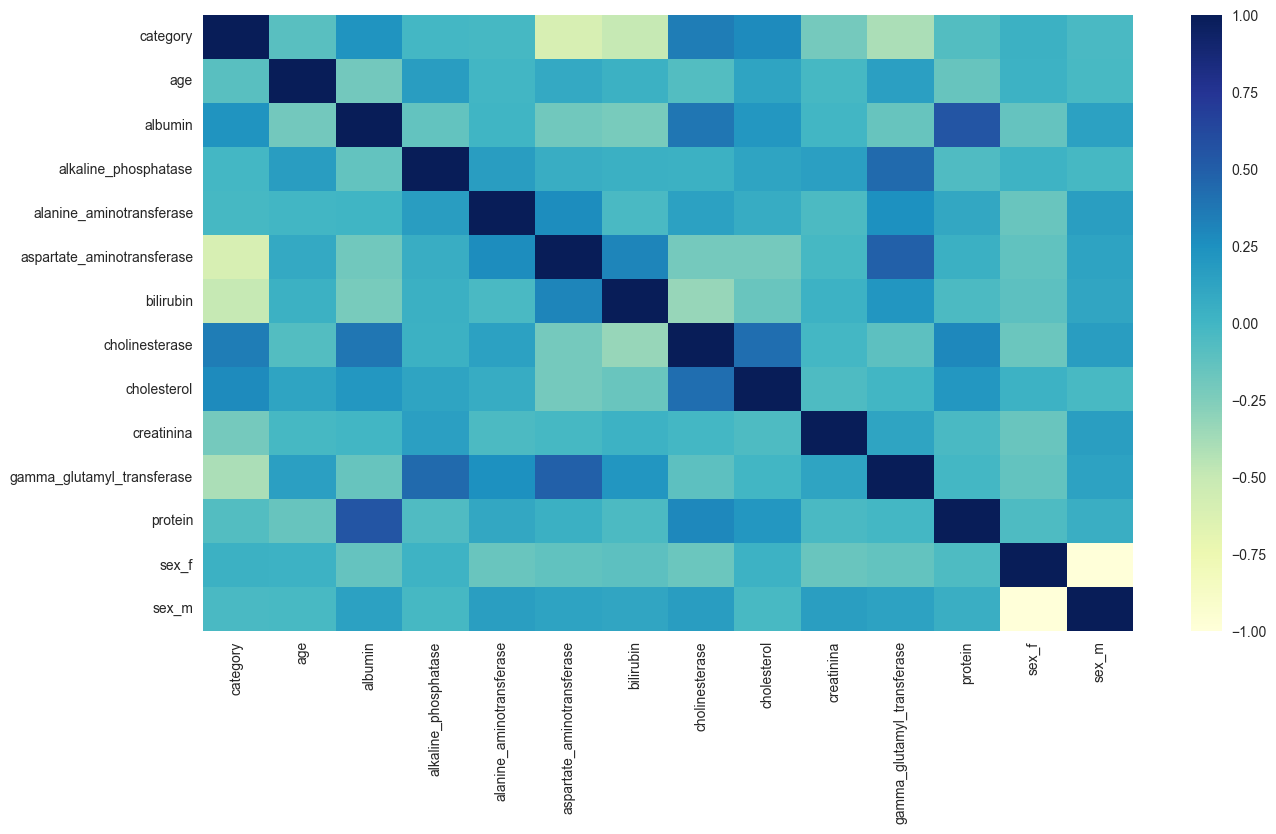

In [30]:
# Plotting correlation heatmap
plt.figure(figsize =(15, 8))
sns.heatmap(liver_disease_data_encoded.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [31]:
# Finding correlation between features
liver_disease_data_encoded.corr()

,category,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,sex_f,sex_m
category,1.000000,-0.101460,0.229838,-0.014320,-0.022034,-0.601843,-0.497505,0.349835,0.279847,-0.206598,-0.405606,-0.075278,0.038391,-0.038391
age,-0.101460,1.000000,-0.196842,0.168080,-0.005690,0.088666,0.032492,-0.075093,0.123789,-0.022296,0.153087,-0.153672,0.024544,-0.024544
albumin,0.229838,-0.196842,1.000000,-0.138015,0.001444,-0.193342,-0.221641,0.375817,0.204731,-0.001594,-0.155440,0.549975,-0.146138,0.146138
alkaline_phosphatase,-0.014320,0.168080,-0.138015,1.000000,0.166320,0.059637,0.046780,0.033750,0.123197,0.149831,0.440012,-0.055869,0.019808,-0.019808
alanine_aminotransferase,-0.022034,-0.005690,0.001444,0.166320,1.000000,0.273333,-0.038388,0.146729,0.067716,-0.043000,0.248208,0.095016,-0.161502,0.161502
aspartate_aminotransferase,-0.601843,0.088666,-0.193342,0.059637,0.273333,1.000000,0.312231,-0.208536,-0.207938,-0.021387,0.491263,0.039999,-0.130891,0.130891
bilirubin,-0.497505,0.032492,-0.221641,0.046780,-0.038388,0.312231,1.000000,-0.333172,-0.157282,0.031224,0.217024,-0.040729,-0.111177,0.111177
cholinesterase,0.349835,-0.075093,0.375817,0.033750,0.146729,-0.208536,-0.333172,1.000000,0.420215,-0.011157,-0.110345,0.293041,-0.169111,0.169111
cholesterol,0.279847,0.123789,0.204731,0.123197,0.067716,-0.207938,-0.157282,0.420215,1.000000,-0.047437,-0.007185,0.206255,0.029251,-0.029251
creatinina,-0.206598,-0.022296,-0.001594,0.149831,-0.043000,-0.021387,0.031224,-0.011157,-0.047437,1.000000,0.121003,-0.031662,-0.159589,0.159589


In [32]:
#Pair Plot
#sns.pairplot(liver_disease_data_encoded)

In [33]:
#Plot for category feature
fig=px.histogram(liver_disease_data,x='category',color='category')
fig.show()

In [34]:
# Plotting the Number of Male and Female patients
fig=px.histogram(liver_disease_data,x='sex',color='sex',  labels={'m': 'Male', 'f':'Female'} )
fig.show()

In [35]:
# Plotting the Number of Male and Female according to category
fig=px.histogram(liver_disease_data,x='sex',color='category', barmode="group")
fig.show()

In [36]:
# Plotting the disease category according to the age
fig=px.histogram(liver_disease_data,x='age',color='category')
fig.show()

In [37]:
#Creating a function to plot histogram for all features according to category
def histogram_plot_using_plotly(column):
    fig=px.histogram(liver_disease_data,x=column,color='category', title="category according to "+column+" level")
    fig.show()

In [38]:
# histogram Plot for all features according to category
for each in num_columns_list:
    if each != 'age':
        histogram_plot_using_plotly(each)

In [39]:
#Scatter plot for protein vs albumin
fig = px.scatter(liver_disease_data, x='protein', y='albumin', color=liver_disease_data['category'])
fig.show()

In [40]:
# Applying PCA function on scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, columns=['pca1','pca2'])
X_pca

,pca1,pca2
0,-0.417326,-2.138184
1,1.123303,-0.212108
2,1.044635,0.788776
3,0.439124,-0.593569
4,-0.040510,-0.620659
...,...,...
610,-9.290792,10.633237
611,-3.946652,-1.833670
612,-3.925598,-0.397153
613,-2.366331,-0.885423


In [41]:
#Scatter plot for pca data
fig = px.scatter(X_pca, x='pca1', y='pca2', color=liver_disease_data['category'])
fig.show()

In [42]:
# Applying PCA function on scaled data with 3 n_components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
X_pca_3_comp = pd.DataFrame(X_pca, columns=['pca1','pca2','pca3'])
X_pca_3_comp

,pca1,pca2,pca3
0,-0.417326,-2.138184,-0.871735
1,1.123303,-0.212108,-0.563286
2,1.044635,0.788776,-1.598443
3,0.439124,-0.593569,-1.512726
4,-0.040510,-0.620659,-0.366617
...,...,...,...
610,-9.290792,10.633237,4.742233
611,-3.946652,-1.833670,0.879681
612,-3.925598,-0.397153,-1.302383
613,-2.366331,-0.885423,-0.800835


In [43]:
#Scatter plot for 3 components pca data
fig = px.scatter_3d(X_pca_3_comp, x='pca1', y='pca2', z='pca3',color=liver_disease_data['category'],width=1500, height=1000)
fig.show()

In [44]:
#Final clean data
final_ld_data = X
final_ld_data['sex_m']=liver_disease_data_encoded['sex_m']
final_ld_data['sex_f']=liver_disease_data_encoded['sex_f']
final_ld_data['category']=liver_disease_data_encoded['category']
final_ld_data

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein,sex_m,sex_f,category
0,-1.533616,-0.540739,-0.613566,-0.815675,-0.383693,-0.198236,-0.574734,-1.903634,0.497070,-0.502286,-0.564419,1,0,3
1,-1.533616,-0.540739,0.081055,-0.410629,-0.305057,-0.381375,1.349161,-0.505077,-0.146590,-0.438203,0.826054,1,0,3
2,-1.533616,0.914755,0.252759,0.305084,0.538767,-0.269457,0.291926,-0.148756,0.094783,-0.115957,1.345164,1,0,3
3,-1.533616,0.273645,-0.633077,0.084865,-0.368571,0.381706,-0.393234,-0.558525,-0.025903,-0.104971,0.677737,1,0,3
4,-1.533616,-0.419448,0.229345,0.163515,-0.302033,-0.091404,0.432588,-0.932661,-0.106361,-0.176378,-0.620038,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1.452371,-1.667014,13.594935,-0.886460,2.283879,1.963828,-1.191832,0.831124,-0.514683,11.193789,-0.657117,0,1,0
611,1.651437,-3.053198,1.349323,-1.004434,0.290761,0.437665,-3.020439,-2.090702,-0.367848,-0.066521,-0.138007,0,1,0
612,1.651437,-2.186833,0.744456,-0.980839,1.942115,1.862083,-2.965989,-1.547313,-0.293425,0.451636,1.845734,0,1,0
613,-0.140155,-1.493741,-0.078942,0.415194,0.823066,0.437665,-2.103866,-1.039557,-0.589106,0.191642,-0.193626,0,1,0


## Model Building and Evaluation

The model that were used:

    1. Logistic Regression
    2. Naive Bayes
    3. SVM
    4. Decision Tree
    5. KNN
    6. Random Forest

In [45]:
# X -> features, y -> label 
X = final_ld_data.iloc[:,0:-1]
y = final_ld_data['category']

In [46]:
# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [47]:
#Create a function to plot heatmap for confusion_matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    fig = px.imshow(cm,
                     x=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease'],
                     y=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease'],
                     text_auto=True, aspect="auto",
                     labels=dict(x="Predicted value", y="Actual value"), title = 'Confusion Matrix'
                    )
    fig.show()

### Naive Bayes classifier

**Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem.**

***Types of Naive Bayes***

    1. Multinomial Naive Bayes
    This classifier is often used for text classification problems. It assumes that the features are from multinomial distributions, which means each element of the feature vector represents the number of times it appears.
    2. Gaussian Naive Bayes
    This classifier is used with continuous variables and Gaussian distributions, which are also known as normal distributions. It is suitable for more general classification tasks.
    3. Bernoulli Naive Bayes
    This classifier is used with Boolean variables, which are variables with two values, such as True and False or 1 and 0

In [48]:
# training a Naive Bayes classifier  
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 

In [49]:
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy)

0.8780487804878049


In [50]:
#accuracy score on train data
accuracy = gnb.score(X_train, y_train) 
print(accuracy)

0.9207317073170732


In [51]:
# Confusion matrix for test data
plot_confusion_matrix(y_test, gnb_predictions)

In [52]:
#Classification report for test data
print(classification_report(y_test, gnb_predictions, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.83      0.71      0.77         7
       fibrosis       0.20      1.00      0.33         2
      hepatitis       0.00      0.00      0.00         4
     no_disease       0.98      0.93      0.95       108
suspect_disease       1.00      0.50      0.67         2

       accuracy                           0.88       123
      macro avg       0.60      0.63      0.54       123
   weighted avg       0.93      0.88      0.90       123



In [53]:
# Confusion matrix for train data
gnb_predictions_train = gnb.predict(X_train) 
plot_confusion_matrix(y_train, gnb_predictions_train)

In [54]:
#Classification report for train data
print(classification_report(y_train, gnb_predictions_train, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.86      0.83      0.84        23
       fibrosis       0.52      0.58      0.55        19
      hepatitis       0.46      0.55      0.50        20
     no_disease       0.97      0.96      0.96       425
suspect_disease       0.83      1.00      0.91         5

       accuracy                           0.92       492
      macro avg       0.73      0.78      0.75       492
   weighted avg       0.93      0.92      0.92       492



In [55]:
#Hyperparameter Tuning
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB, 
                 cv=10, 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X, y)

print("Best params: ",gs_NB.best_params_)
print("Best Score: ",gs_NB.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best params:  {'var_smoothing': 0.43287612810830584}
Best Score:  0.9186673717609729


In [56]:
# predict using Naive Bayes classifier after hyperparameter tuning
gnb_predictions = gs_NB.predict(X_test) 

In [57]:
# accuracy on X_test after hyperparameter tuning
accuracy = gs_NB.score(X_test, y_test) 
print(accuracy)

0.943089430894309


In [58]:
# Confusion matrix for test data after hyperparameter tuning
plot_confusion_matrix(y_test, gnb_predictions)

In [59]:
#Classification report for test data after hyperparameter tuning
print(classification_report(y_test, gnb_predictions, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.83      0.71      0.77         7
       fibrosis       0.40      1.00      0.57         2
      hepatitis       0.00      0.00      0.00         4
     no_disease       0.98      0.99      0.99       108
suspect_disease       1.00      1.00      1.00         2

       accuracy                           0.94       123
      macro avg       0.64      0.74      0.67       123
   weighted avg       0.93      0.94      0.94       123



### SMOTE algorithm

Imbalanced Data Distribution generally happens when observations in one of the class are much higher or lower than the other classes. This leads to having major misclassification of the minority class in comparison with the majority class.

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

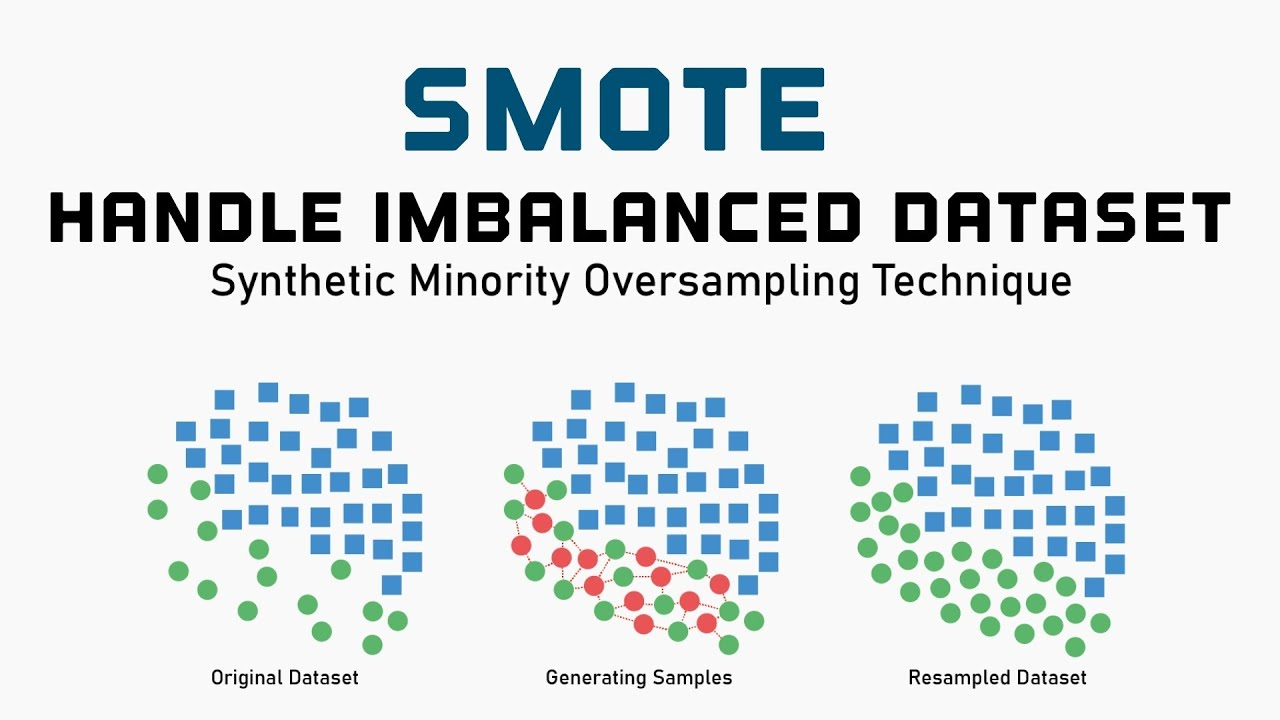

In [60]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset values_count ', y.value_counts())
print('Resample dataset values_count', y_smote.value_counts())

Original dataset values_count  category
3    533
0     30
2     24
1     21
4      7
Name: count, dtype: int64
Resample dataset values_count category
3    533
4    533
2    533
1    533
0    533
Name: count, dtype: int64


In [61]:
# dividing X, y into train and test data 
X_train1, X_test1, y_train1, y_test1 = train_test_split(x_smote, y_smote, test_size=0.2, random_state = 0)

### Training the Naive Bayes Again after dealing with imbalance

In [62]:
# training a Naive Bayes classifier  
gnb = GaussianNB().fit(X_train1, y_train1) 
gnb_predictions = gnb.predict(X_test1) 

In [63]:
# accuracy on train and test balance data 
print("The Naive Bayes Model accuracy on train data - ", gnb.score(X_train1, y_train1))
print("The Naive Bayes Model accuracy on test data - ", gnb.score(X_test1, y_test1))


The Naive Bayes Model accuracy on train data -  0.8527204502814258
The Naive Bayes Model accuracy on test data -  0.8649155722326454


In [64]:
# Confusion matrix for test data
plot_confusion_matrix(y_test1, gnb_predictions)

In [65]:
#Classification report for test data
print(classification_report(y_test1, gnb_predictions, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.96      0.85      0.90       118
       fibrosis       0.75      0.75      0.75       101
      hepatitis       0.75      0.80      0.77        99
     no_disease       0.89      0.91      0.90        98
suspect_disease       0.96      1.00      0.98       117

       accuracy                           0.86       533
      macro avg       0.86      0.86      0.86       533
   weighted avg       0.87      0.86      0.87       533



### SVM

**A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space.**

When dealing with multi-class classification using Support Vector Machines (SVM), two primary strategies are commonly employed: One-vs-One (OvO) and One-vs-All (OvA).

    1. One-vs-One (OvO) Approach
    2. One-vs-All (OvA) Approach

https://www.geeksforgeeks.org/multi-class-classification-using-support-vector-machines-svm/

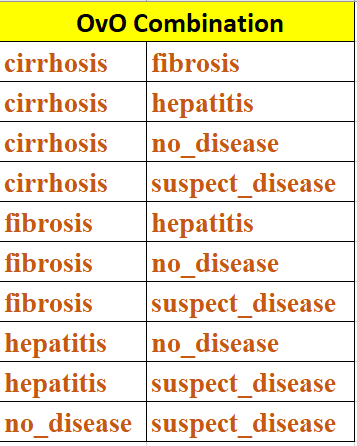                                          



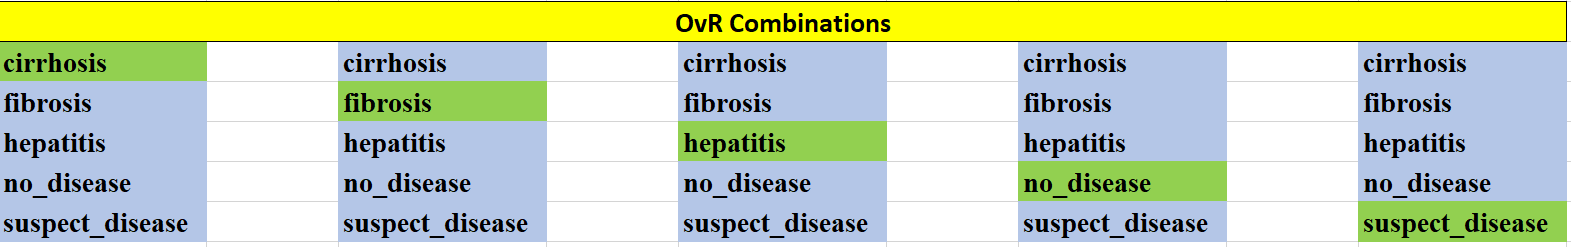

#### One-vs-One (OvO) Implementation:

In [66]:
# Initialize the SVM classifier with One-vs-One strategy
svm_ovo = SVC(decision_function_shape='ovo')
svm_ovo.fit(X_train1, y_train1)

# Predict using One-vs-One model
y_pred_ovo = svm_ovo.predict(X_test1)

In [67]:
# accuracy on train and test balance data 
print("The SVM OvO Model accuracy on train data - ", svm_ovo.score(X_train1, y_train1))
print("The SVM OvO Model accuracy on test data - ", svm_ovo.score(X_test1, y_test1))

The SVM OvO Model accuracy on train data -  0.9770168855534709
The SVM OvO Model accuracy on test data -  0.9737335834896811


In [68]:
# Confusion matrix for test data
plot_confusion_matrix(y_test1, y_pred_ovo)

In [69]:
#Classification report for test data
print(classification_report(y_test1, y_pred_ovo, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       1.00      0.97      0.99       118
       fibrosis       0.92      1.00      0.96       101
      hepatitis       0.96      0.95      0.95        99
     no_disease       1.00      0.94      0.97        98
suspect_disease       0.99      1.00      1.00       117

       accuracy                           0.97       533
      macro avg       0.97      0.97      0.97       533
   weighted avg       0.98      0.97      0.97       533



#### One-vs-Rest (OvR) Implementation:

In [70]:
# Initialize the SVM classifier with One-vs-All strategy
svm_ova = SVC(decision_function_shape='ovr')
svm_ova.fit(X_train1, y_train1)

# Predict using One-vs-All model
y_pred_ova = svm_ova.predict(X_test1)

In [71]:
# accuracy on train and test balance data 
print("The SVM OvR Model accuracy on train data - ", svm_ova.score(X_train1, y_train1))
print("The SVM OvR Model accuracy on test data - ", svm_ova.score(X_test1, y_test1))

The SVM OvR Model accuracy on train data -  0.9770168855534709
The SVM OvR Model accuracy on test data -  0.9737335834896811


In [72]:
# Confusion matrix for test data
plot_confusion_matrix(y_test1, y_pred_ova)

In [73]:
#Classification report for test data
print(classification_report(y_test1, y_pred_ova, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       1.00      0.97      0.99       118
       fibrosis       0.92      1.00      0.96       101
      hepatitis       0.96      0.95      0.95        99
     no_disease       1.00      0.94      0.97        98
suspect_disease       0.99      1.00      1.00       117

       accuracy                           0.97       533
      macro avg       0.97      0.97      0.97       533
   weighted avg       0.98      0.97      0.97       533



### KNN

**K-Nearest Neighbors (KNN) can used for both classification and regression tasks. It belongs to the category of supervised learning, meaning it learns from labeled data to make predictions on new, unseen data.**

In [74]:
#Finding the optimal value of ‘K’
train_score={}
test_score={}
n_neighbors=np.arange(2,31,1)
for i in n_neighbors:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train1,y_train1)
  train_score[i]=knn.score(X_train1,y_train1)
  test_score[i]=knn.score(X_test1,y_test1)

In [75]:
# PLotting K v/s accuracy graph
train = go.Scatter(x=list(n_neighbors), y=list(train_score.values()), mode='lines', name='Train Accuracy')
test= go.Scatter(x=list(n_neighbors), y=list(test_score.values()), mode='lines', name='Test Accuracy')
fig = go.Figure(data=[train, test])

fig.update_layout(title='KNN: Varying number of Neighbors',
                  xaxis_title='Number Of Neighbors',
                  yaxis_title='Accuracy')

fig.show()

Text(0, 0.5, 'Error Rate')

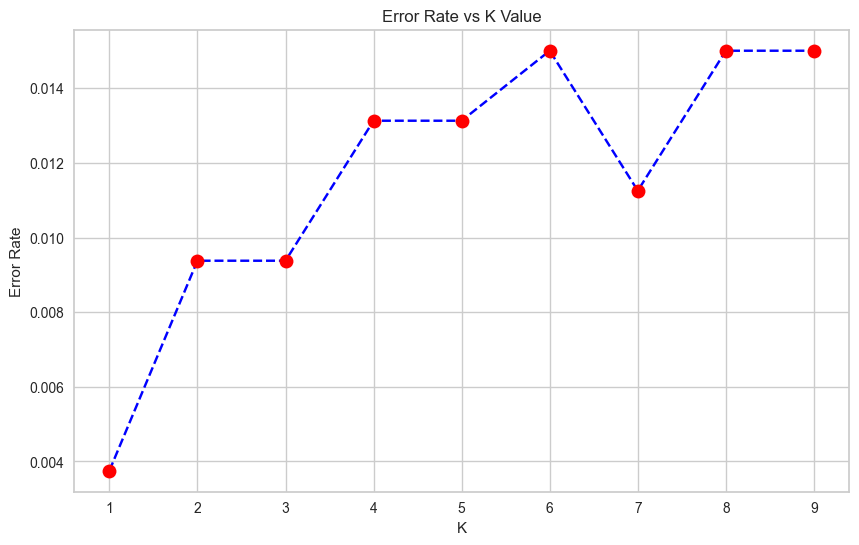

In [76]:
# PLotting K v/s error rate
error_rate=[]
for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train1,y_train1)
    pred_i=knn.predict(X_test1)
    error_rate.append(np.mean(pred_i!=y_test1))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [77]:
# Training KNN classifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1,y_train1)

#Predicting the The Test Data with model
y_pred_knn=knn.predict(X_test1)

In [78]:
# accuracy on train and test balance data 
print("The KNN Model accuracy on train data - ", knn.score(X_train1, y_train1))
print("The KNN Model accuracy on test data - ", knn.score(X_test1, y_test1))

The KNN Model accuracy on train data -  0.9924953095684803
The KNN Model accuracy on test data -  0.9906191369606003


In [79]:
#Confusion Matrix for test Data
plot_confusion_matrix(y_test1,y_pred_knn)

In [80]:
# Classification Report for test Data
print(classification_report(y_test1,y_pred_knn, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       1.00      1.00      1.00       118
       fibrosis       0.98      1.00      0.99       101
      hepatitis       0.98      1.00      0.99        99
     no_disease       1.00      0.95      0.97        98
suspect_disease       0.99      1.00      1.00       117

       accuracy                           0.99       533
      macro avg       0.99      0.99      0.99       533
   weighted avg       0.99      0.99      0.99       533



### Logistic Regression

**By design, logistic regression models automatically handle binary classification problems in which the target vector (label column) has only two classes.**

**However, three extensions to logistic regression are available to use logistic regression for multiclass classification in which the target vector has more than two classes.**

These extensions include:

    1. One-vs-Rest (OvR) multiclass strategy
    2. One-vs-One (OvO) multiclass strategy
    3. Multinomial method

#### Multinomial Implementation:

In [81]:
# Multinomial Logistic Regression
multi_model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')  # 'lbfgs' solver is used for multinomial
multi_model_LR.fit(X_train1, y_train1)

# Make predictions
y_pred_multi_LR = multi_model_LR.predict(X_test1)

In [82]:
# accuracy on train and test balance data 
print("The Logistic Regression Multinomial Model accuracy on train data - ", multi_model_LR.score(X_train1, y_train1))
print("The Logistic Regression Multinomial Model accuracy on test data - ", multi_model_LR.score(X_test1, y_test1))

The Logistic Regression Multinomial Model accuracy on train data -  0.9136960600375235
The Logistic Regression Multinomial Model accuracy on test data -  0.9099437148217636


In [83]:
#Confusion Matrix for test Data
plot_confusion_matrix(y_test1,y_pred_multi_LR)

In [84]:
# Classification Report for test Data
print(classification_report(y_test1,y_pred_multi_LR, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.94      0.91      0.92       118
       fibrosis       0.78      0.87      0.82       101
      hepatitis       0.88      0.85      0.87        99
     no_disease       0.96      0.91      0.93        98
suspect_disease       0.99      1.00      1.00       117

       accuracy                           0.91       533
      macro avg       0.91      0.91      0.91       533
   weighted avg       0.91      0.91      0.91       533



#### One-vs-Rest (OvR) multiclass strategy

In [85]:
# One-vs-Rest Logistic Regression
ovr_LR_model = LogisticRegression(multi_class='ovr', solver='liblinear')  # Use 'liblinear' for small datasets
ovr_LR_model.fit(X_train1, y_train1)

# Make predictions
y_pred_ovr_LR = ovr_LR_model.predict(X_test1)

In [86]:
# accuracy on train and test balance data 
print("The Logistic Regression OvR Model accuracy on train data - ", ovr_LR_model.score(X_train1, y_train1))
print("The Logistic Regression OvR Model accuracy on test data - ", ovr_LR_model.score(X_test1, y_test1))

The Logistic Regression OvR Model accuracy on train data -  0.9024390243902439
The Logistic Regression OvR Model accuracy on test data -  0.9061913696060038


In [87]:
#Confusion Matrix for test Data
plot_confusion_matrix(y_test1,y_pred_ovr_LR)

In [88]:
# Classification Report for test Data
print(classification_report(y_test1,y_pred_ovr_LR, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.97      0.90      0.93       118
       fibrosis       0.77      0.83      0.80       101
      hepatitis       0.84      0.85      0.84        99
     no_disease       0.96      0.94      0.95        98
suspect_disease       0.98      1.00      0.99       117

       accuracy                           0.91       533
      macro avg       0.90      0.90      0.90       533
   weighted avg       0.91      0.91      0.91       533



### Decision Tree

**A decision tree algorithm classifies data by splitting it into subsets based on feature values, creating a tree-like structure of decisions. It predicts class labels by following the paths from the root to the leaf nodes based on input features.**

In [89]:
# Building the decision tree crassifier model as model_DT. In which after comparing with different depth, leaf nodes and category below are the most suited values for them to avoid any overfiiting and underfitting
model_DT = DecisionTreeClassifier(max_depth= 20, max_leaf_nodes= 30, criterion= 'entropy')
model_DT.fit(X_train1, y_train1) # Fitting/Training the data

# Predicting using the model
y_pred_DT = model_DT.predict(X_test1)

In [90]:
# accuracy on train and test balance data 
print("The Decision Tree Model accuracy on train data - ", model_DT.score(X_train1, y_train1))
print("The Decision Tree Model accuracy on test data - ", model_DT.score(X_test1, y_test1))

The Decision Tree Model accuracy on train data -  0.9577861163227017
The Decision Tree Model accuracy on test data -  0.9287054409005628


In [91]:
#Confusion Matrix for test Data
plot_confusion_matrix(y_test1,y_pred_DT)

In [92]:
# Classification Report for test Data
print(classification_report(y_test1,y_pred_DT, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       0.96      0.92      0.94       118
       fibrosis       0.88      0.98      0.93       101
      hepatitis       0.87      0.90      0.89        99
     no_disease       0.95      0.84      0.89        98
suspect_disease       0.97      1.00      0.99       117

       accuracy                           0.93       533
      macro avg       0.93      0.93      0.93       533
   weighted avg       0.93      0.93      0.93       533



### Random Forest

**Random Forest can be used for both classification and regression problems.**

In [93]:
# Initialize the model
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train1, y_train1)

# Make predictions
y_pred_RF = rf_model.predict(X_test1)

In [94]:
# accuracy on train and test balance data 
print("The Random Forest Model accuracy on train data - ", rf_model.score(X_train1, y_train1))
print("The Random Forest Model accuracy on test data - ", rf_model.score(X_test1, y_test1))

The Random Forest Model accuracy on train data -  1.0
The Random Forest Model accuracy on test data -  0.9962476547842402


In [95]:
#Confusion Matrix for test Data
plot_confusion_matrix(y_test1,y_pred_RF)

In [96]:
# Classification Report for test Data
print(classification_report(y_test1,y_pred_RF, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))

                 precision    recall  f1-score   support

      cirrhosis       1.00      0.99      1.00       118
       fibrosis       0.99      1.00      1.00       101
      hepatitis       0.99      1.00      0.99        99
     no_disease       1.00      0.99      0.99        98
suspect_disease       1.00      1.00      1.00       117

       accuracy                           1.00       533
      macro avg       1.00      1.00      1.00       533
   weighted avg       1.00      1.00      1.00       533



### Testing the model on original test data created on imbalance dataset

In [97]:
# Testing all the models on original test data
models = [gnb, svm_ova, knn, multi_model_LR, ovr_LR_model, model_DT, rf_model]

for model in models:
    # Predict on original test dataset
    predictions_final = model.predict(X_test)
    print("=========================================================="+str(model)+"================================================================================================")
    # Confusion matrix for test data
    plot_confusion_matrix(y_test, predictions_final)
    #Classification report for test data
    print(classification_report(y_test, predictions_final, target_names=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease']))
    print("====================================================================================================================================================================")

==========================================================GaussianNB()================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       0.86      0.86      0.86         7
       fibrosis       0.29      1.00      0.44         2
      hepatitis       0.22      0.50      0.31         4
     no_disease       1.00      0.89      0.94       108
suspect_disease       0.50      1.00      0.67         2

       accuracy                           0.88       123
      macro avg       0.57      0.85      0.64       123
   weighted avg       0.95      0.88      0.90       123

==========================================================SVC()================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       0.88      1.00      0.93         7
       fibrosis       0.50      1.00      0.67         2
      hepatitis       0.50      0.75      0.60         4
     no_disease       1.00      0.95      0.98       108
suspect_disease       1.00      1.00      1.00         2

       accuracy                           0.95       123
      macro avg       0.78      0.94      0.84       123
   weighted avg       0.97      0.95      0.96       123

==========================================================KNeighborsClassifier(n_neighbors=3)================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       1.00      1.00      1.00         7
       fibrosis       0.67      1.00      0.80         2
      hepatitis       0.80      1.00      0.89         4
     no_disease       1.00      0.98      0.99       108
suspect_disease       1.00      1.00      1.00         2

       accuracy                           0.98       123
      macro avg       0.89      1.00      0.94       123
   weighted avg       0.99      0.98      0.98       123

==========================================================LogisticRegression(multi_class='multinomial')================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       0.67      0.86      0.75         7
       fibrosis       0.14      0.50      0.22         2
      hepatitis       0.00      0.00      0.00         4
     no_disease       1.00      0.94      0.97       108
suspect_disease       1.00      1.00      1.00         2

       accuracy                           0.89       123
      macro avg       0.56      0.66      0.59       123
   weighted avg       0.93      0.89      0.91       123

==========================================================LogisticRegression(multi_class='ovr', solver='liblinear')================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       0.67      0.86      0.75         7
       fibrosis       0.25      1.00      0.40         2
      hepatitis       0.00      0.00      0.00         4
     no_disease       1.00      0.91      0.95       108
suspect_disease       0.40      1.00      0.57         2

       accuracy                           0.88       123
      macro avg       0.46      0.75      0.53       123
   weighted avg       0.93      0.88      0.89       123

==========================================================DecisionTreeClassifier(criterion='entropy', max_depth=20, max_leaf_nodes=30)================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       0.75      0.86      0.80         7
       fibrosis       0.67      1.00      0.80         2
      hepatitis       0.50      0.75      0.60         4
     no_disease       0.99      0.95      0.97       108
suspect_disease       1.00      1.00      1.00         2

       accuracy                           0.94       123
      macro avg       0.78      0.91      0.83       123
   weighted avg       0.96      0.94      0.95       123

==========================================================RandomForestClassifier()================================================================================================


                 precision    recall  f1-score   support

      cirrhosis       1.00      1.00      1.00         7
       fibrosis       1.00      1.00      1.00         2
      hepatitis       1.00      1.00      1.00         4
     no_disease       1.00      1.00      1.00       108
suspect_disease       1.00      1.00      1.00         2

       accuracy                           1.00       123
      macro avg       1.00      1.00      1.00       123
   weighted avg       1.00      1.00      1.00       123



### ROC Curve

A receiver operating characteristic (ROC) curve is a graph that shows how well a binary classifier model performs at different threshold values. It's created by plotting the true positive rate (TPR) against the false positive rate (FPR) for each threshold. 

ROC curves are useful for assessing the performance of diagnostic tests. The area under the ROC curve (AUC) is a measure of accuracy, or how well an algorithm can distinguish between two groups.

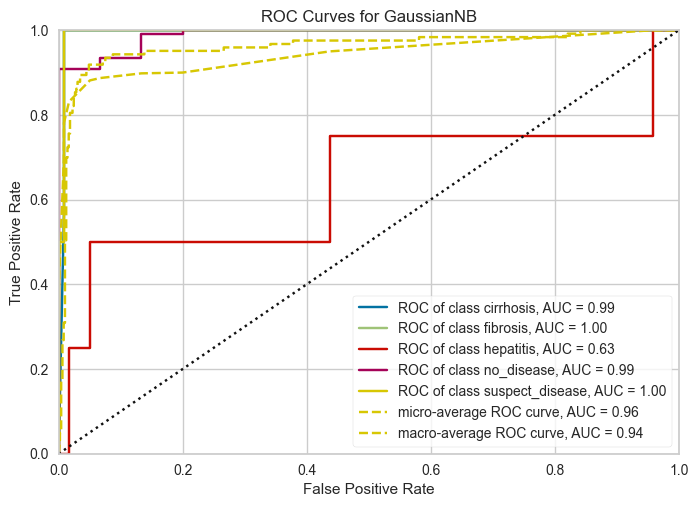

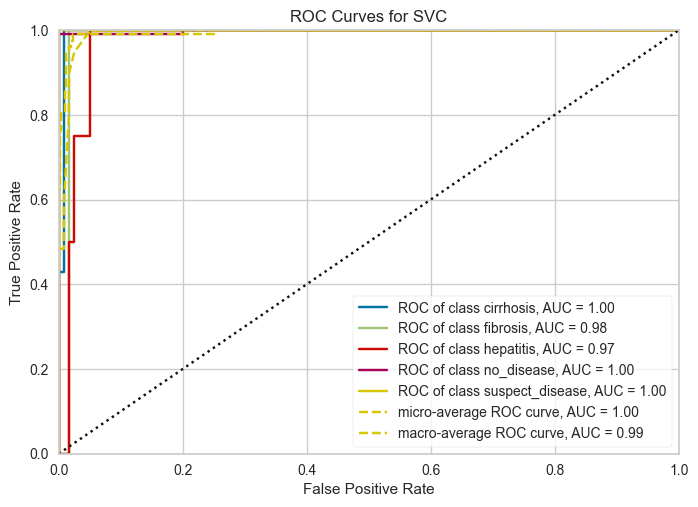

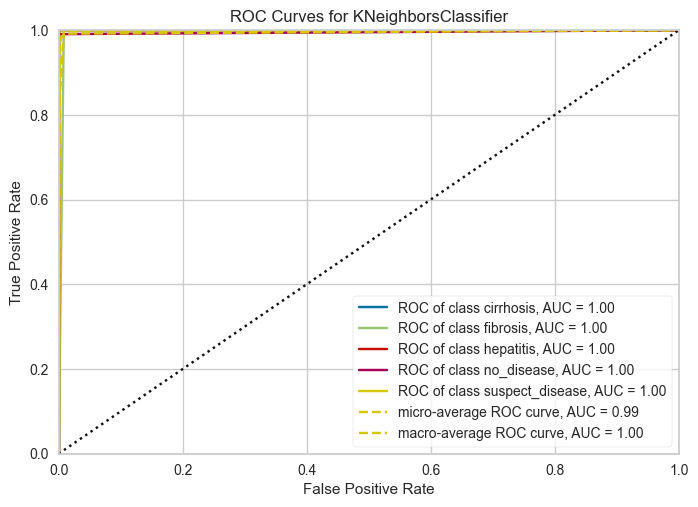

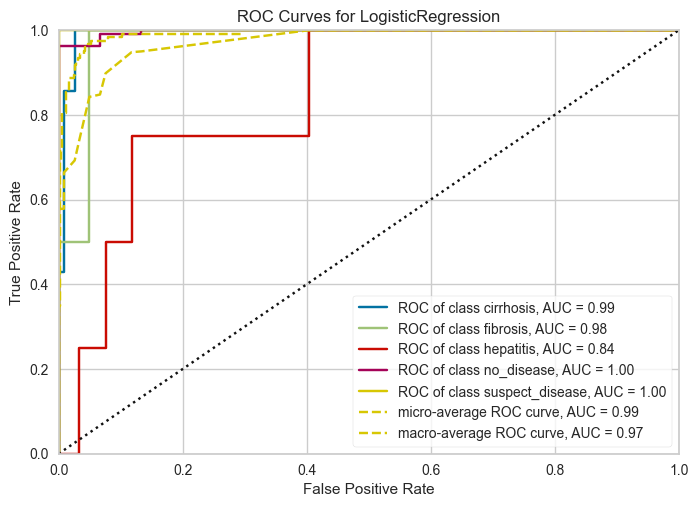

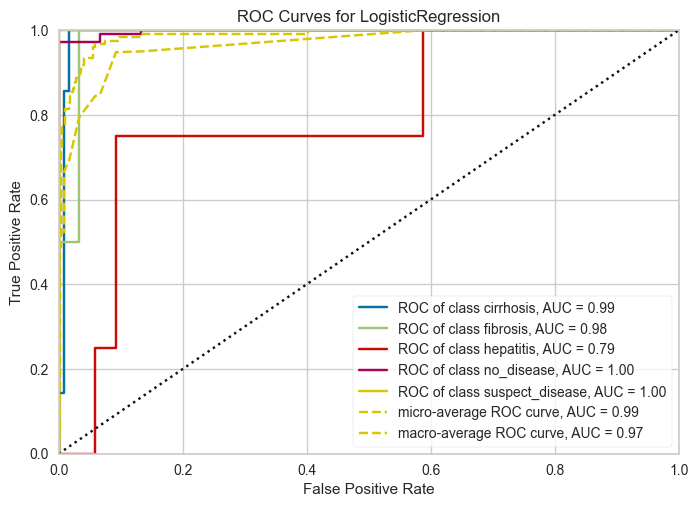

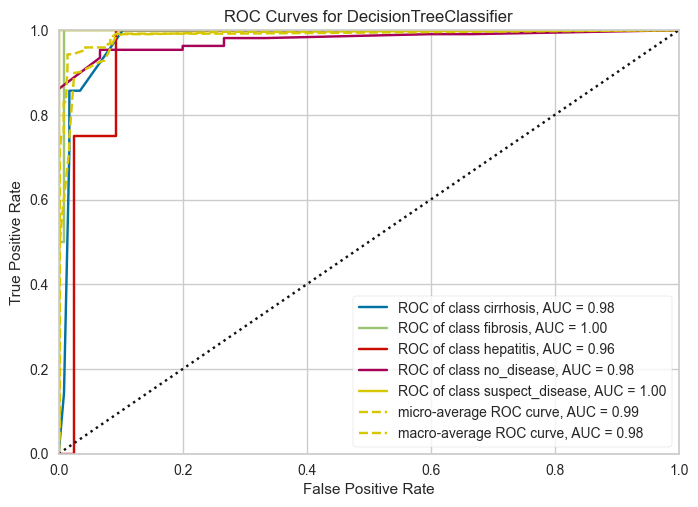

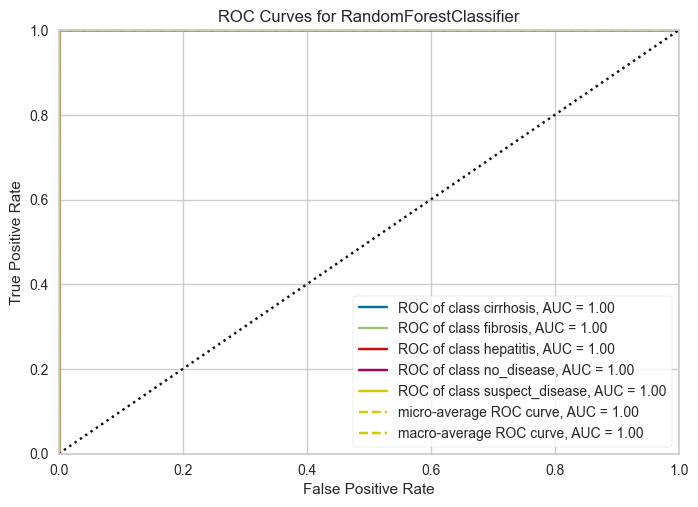

In [98]:
# Instaniate the classification model and visualizer

models = [gnb, svm_ova, knn, multi_model_LR, ovr_LR_model, model_DT, rf_model]

for model in models:
    visualizer = ROCAUC(model, classes=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease'])
    visualizer.fit(X_train1, y_train1)        # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)        # Evaluate the model on the test data
    visualizer.show()

### AUPRC

The area under the precision-recall curve (AUPRC) is used as metric for comparing the performance of the evaluated anomaly detection methods.

Higher is better, and the closer you are to 1.0, the closer you are to solving the problem.

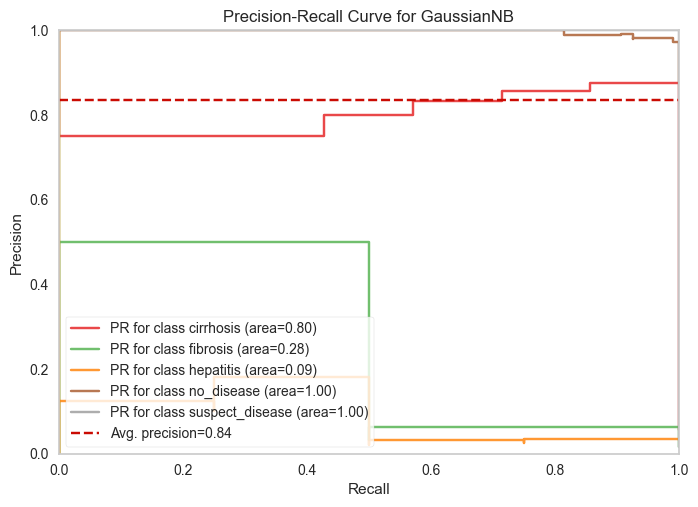

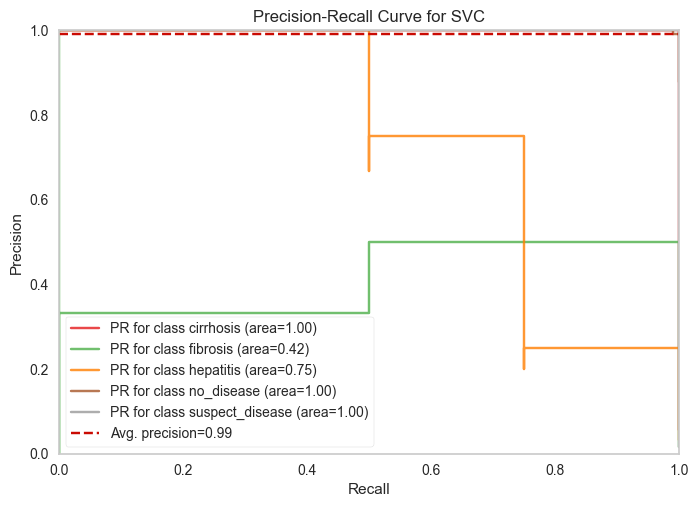

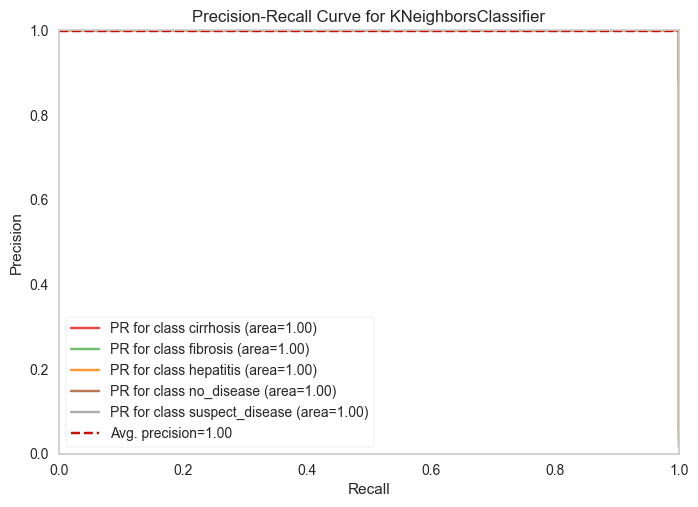

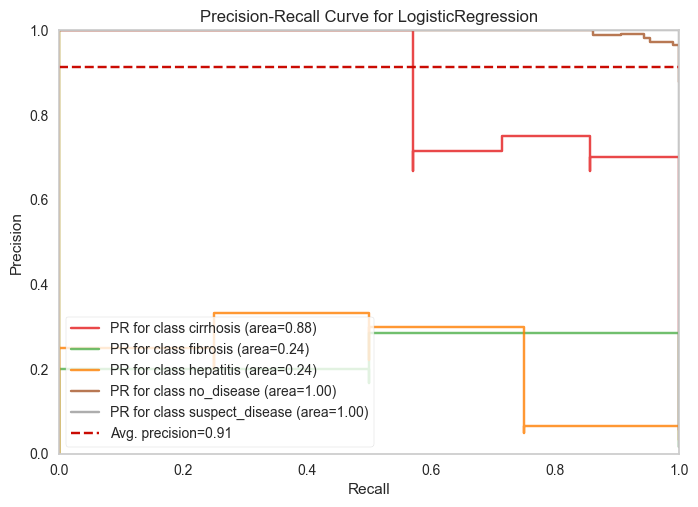

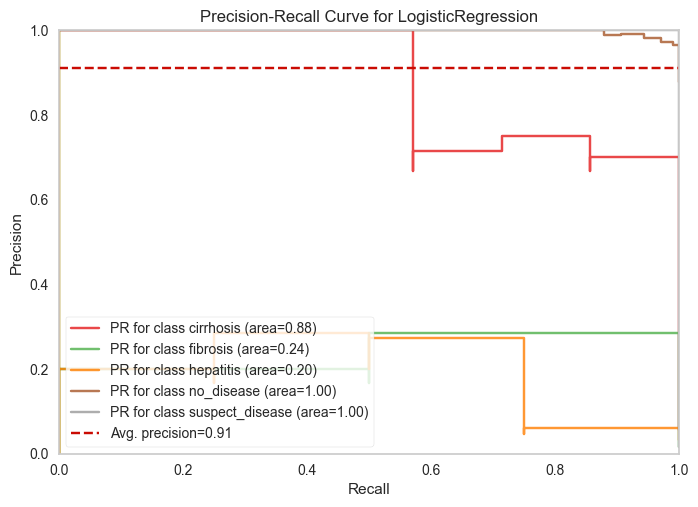

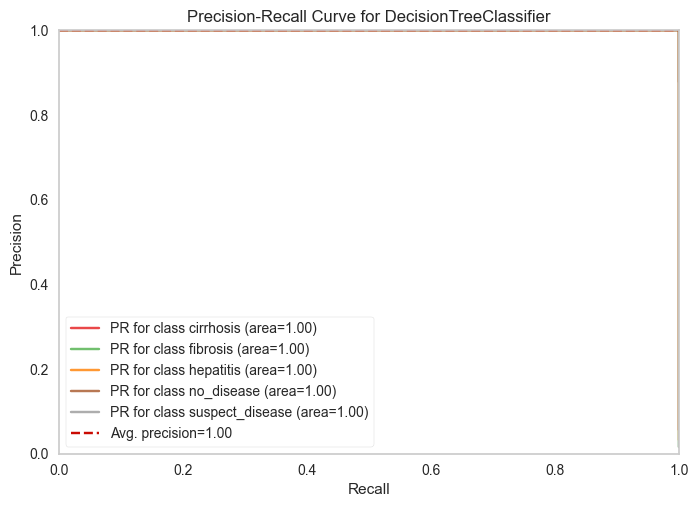

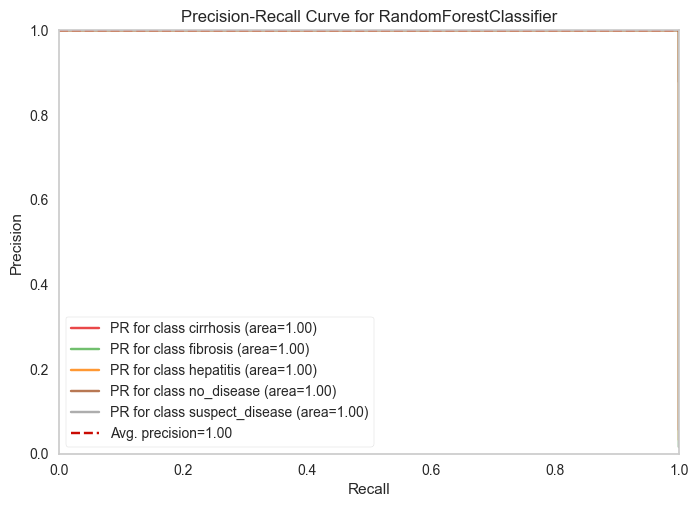

In [99]:
# Create the visualizer, fit, score, and show it

models = [gnb, svm_ova, knn, multi_model_LR, ovr_LR_model, model_DT, rf_model]

for model in models:
    viz = PrecisionRecallCurve(model,per_class=True,cmap="Set1", classes=['cirrhosis','fibrosis','hepatitis','no_disease','suspect_disease'])
    viz.fit(x_smote, y_smote)
    viz.score(X_test, y_test)
    viz.show()

In [100]:
# Saving the standard scaler as pickle
scalerfile = 'artifacts/scaler.sav'
pickle.dump(sc, open(scalerfile, 'wb'))

In [101]:
# save the model 
model_name = 'artifacts/knn.sav'
pickle.dump(knn, open(model_name, 'wb')) 